In [33]:
import sklearn.datasets as dt
from sklearn.metrics import confusion_matrix
import numpy.random as rd
import numpy as np
import matplotlib.pyplot as plt

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])
(30, 569)
(569,)
212 357
Threshold:  0
Matriz de Confusão: 
 [[  0 212]
 [  0 357]]
True Positives:  0
True Negatives:  357
False Positives:  0
False Negatives:  212
Threshold:  0.2
Matriz de Confusão: 
 [[  0 212]
 [  0 357]]
True Positives:  0
True Negatives:  357
False Positives:  0
False Negatives:  212
Threshold:  0.4
Matriz de Confusão: 
 [[  0 212]
 [  0 357]]
True Positives:  0
True Negatives:  357
False Positives:  0
False Negatives:  212
Threshold:  0.6
Matriz de Confusão: 
 [[  0 212]
 [  0 357]]
True Positives:  0
True Negatives:  357
False Positives:  0
False Negatives:  212
Threshold:  0.8
Matriz de Confusão: 
 [[  0 212]
 [  0 357]]
True Positives:  0
True Negatives:  357
False Positives:  0
False Negatives:  212
Threshold:  1.0
Matriz de Confusão: 
 [[212   0]
 [357   0]]
True Positives:  212
True Negatives:  0
False Positives:  357
False Negatives:  0


C:\Users\anaso\AppData\Local\Temp\ipykernel_15456\1473532229.py:41: RuntimeWarning: invalid value encountered in true_divide
  precision = np.divide(TP , (TP + FP))
C:\Users\anaso\AppData\Local\Temp\ipykernel_15456\1473532229.py:41: RuntimeWarning: invalid value encountered in true_divide
  precision = np.divide(TP , (TP + FP))
C:\Users\anaso\AppData\Local\Temp\ipykernel_15456\1473532229.py:41: RuntimeWarning: invalid value encountered in true_divide
  precision = np.divide(TP , (TP + FP))
C:\Users\anaso\AppData\Local\Temp\ipykernel_15456\1473532229.py:41: RuntimeWarning: invalid value encountered in true_divide
  precision = np.divide(TP , (TP + FP))
C:\Users\anaso\AppData\Local\Temp\ipykernel_15456\1473532229.py:41: RuntimeWarning: invalid value encountered in true_divide
  precision = np.divide(TP , (TP + FP))


(-0.05, 1.05, -0.05, 1.05)

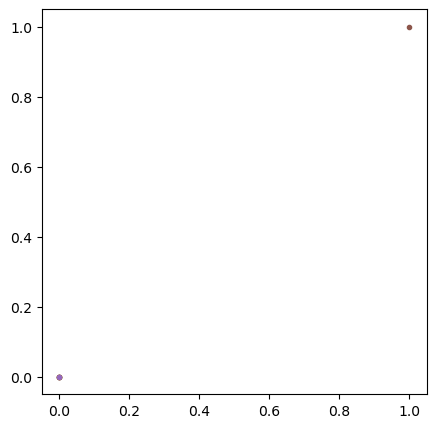

In [42]:
D = dt.load_breast_cancer()

print(D.keys())

X = D.data
X = X.T
y = D.target

print(X.shape)
print(y.shape)

print(np.sum(y==0), np.sum(y==1))

# Gera N (y.shape[0]) amostras entre 0 e 1 e atribui 0 às amostras abaixo do threshold (th) 
# e 1 às amostras acima do threshold (th)
rd.seed(42)
ye = rd.rand(y.shape[0])
plt.figure(figsize=(5,5))

for th in [0, 0.2, 0.4, 0.6, 0.8, 1.0]:
    print("Threshold: ", th)
    ye = (ye > th) # Matriz de True e False
    ye = ye*1 # Converte para valores entre [0, 1]

    CM = confusion_matrix(y, ye)

    print("Matriz de Confusão: \n", CM)

    TP = CM[0][0]
    FN = CM[0][1]
    FP = CM[1][0]
    TN = CM[1][1]

    print("True Positives: ", TP)
    print("True Negatives: ", TN)
    print("False Positives: ", FP)
    print("False Negatives: ", FN)

    recall = np.divide(TP, (TP + FN))
    false_alarm = np.divide(FP , (FP + TN))
    precision = np.divide(TP , (TP + FP))

    plt.plot(false_alarm, recall, '.')

plt.axis('scaled')
